In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("/Users/behrad/Documents/imt tmrin/train.csv")
df= pd.DataFrame(data)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
negative_values_count_df = (df < 0).sum().sum()

print("Number of negative values in DataFrame:", negative_values_count_df)

Number of negative values in DataFrame: 0


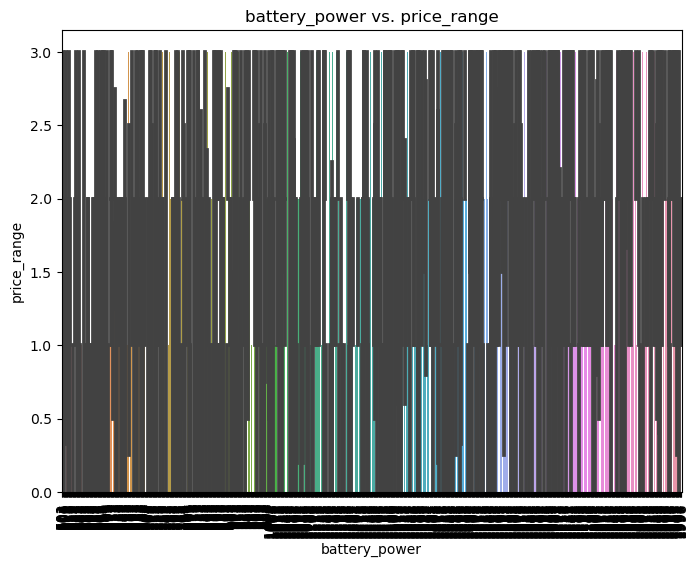

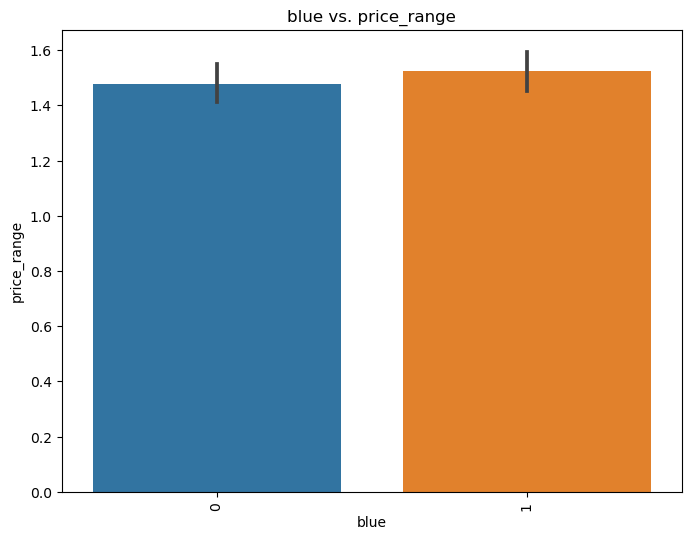

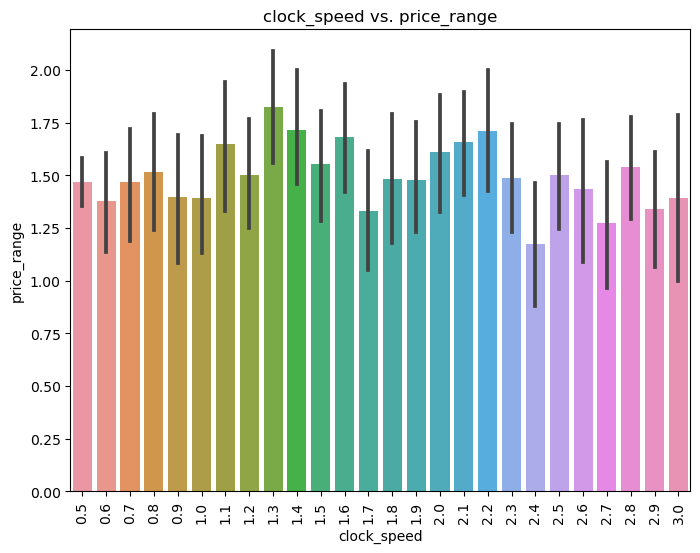

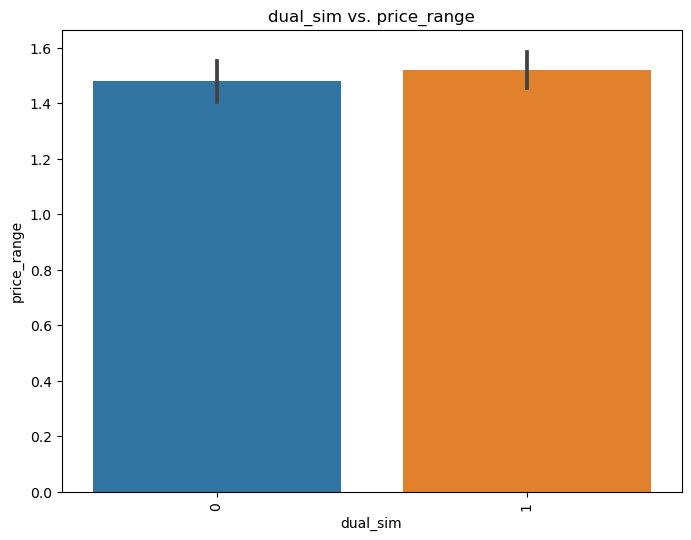

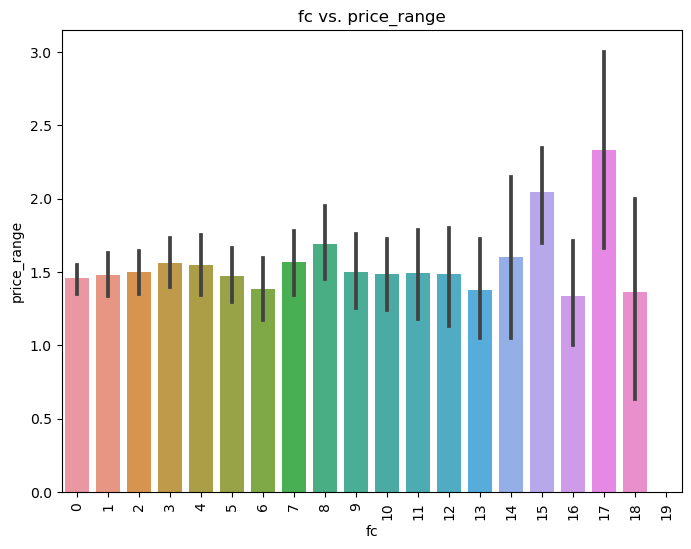

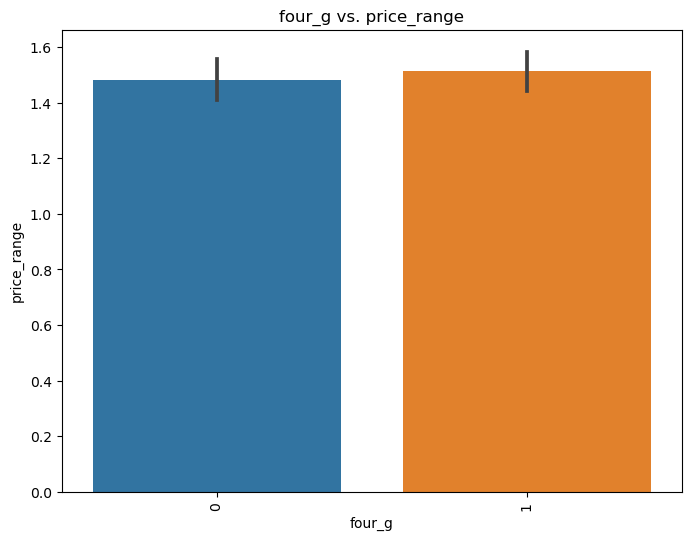

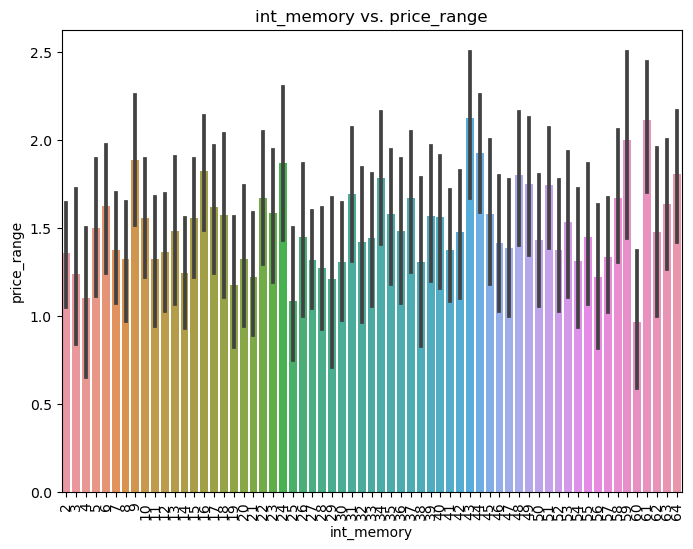

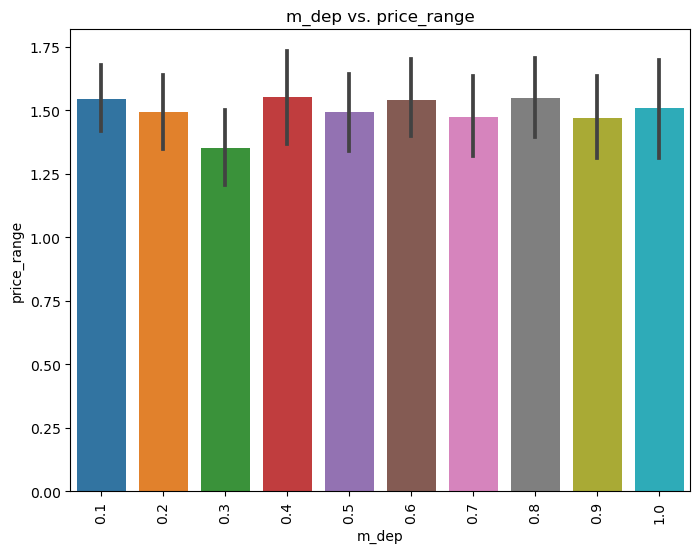

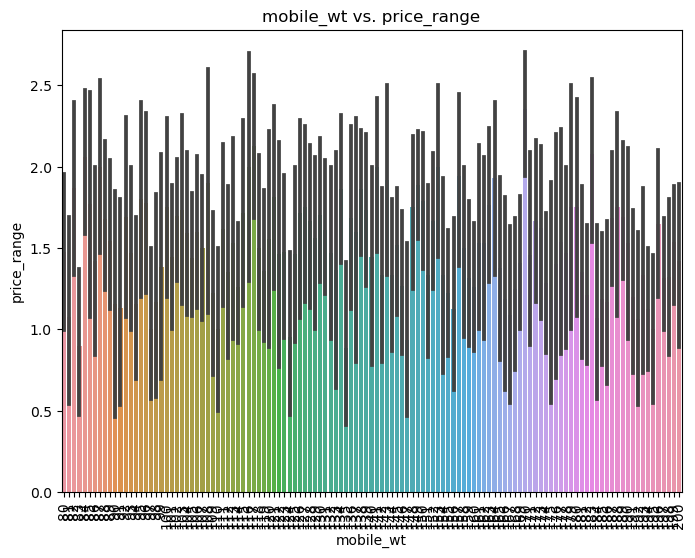

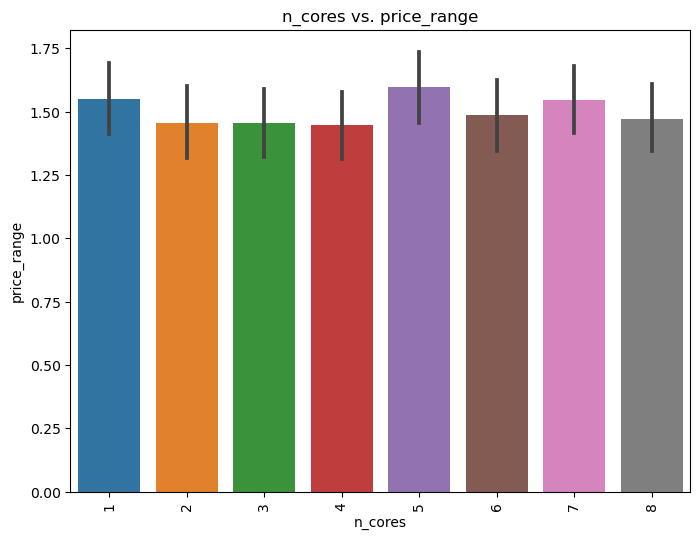

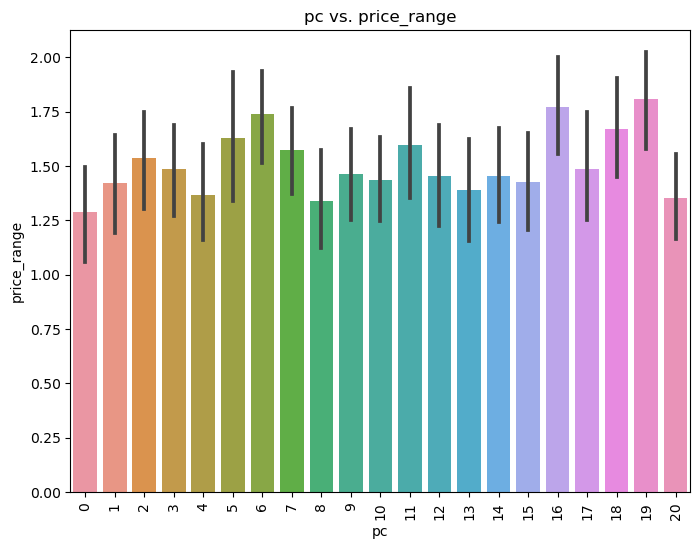

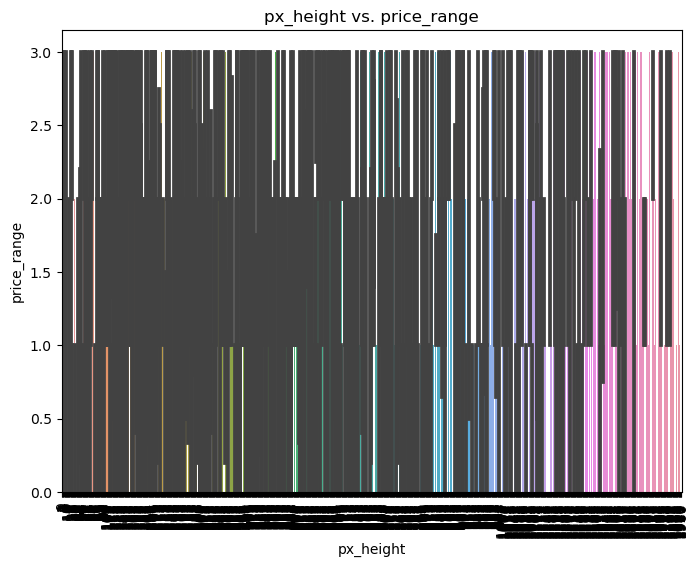

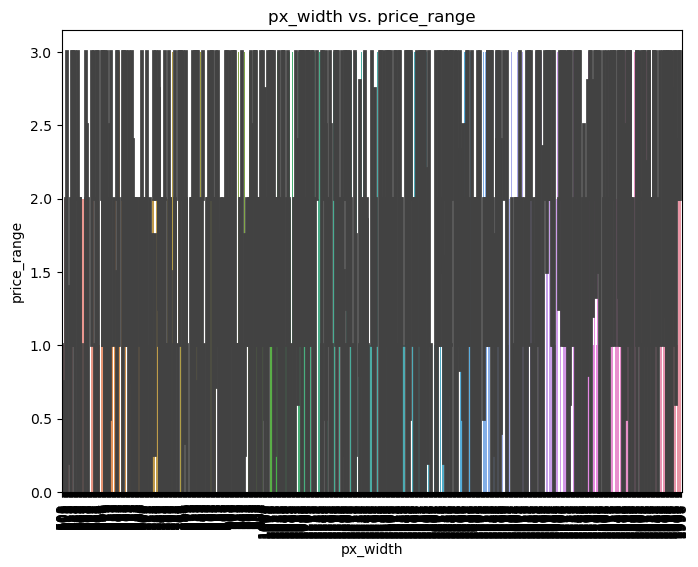

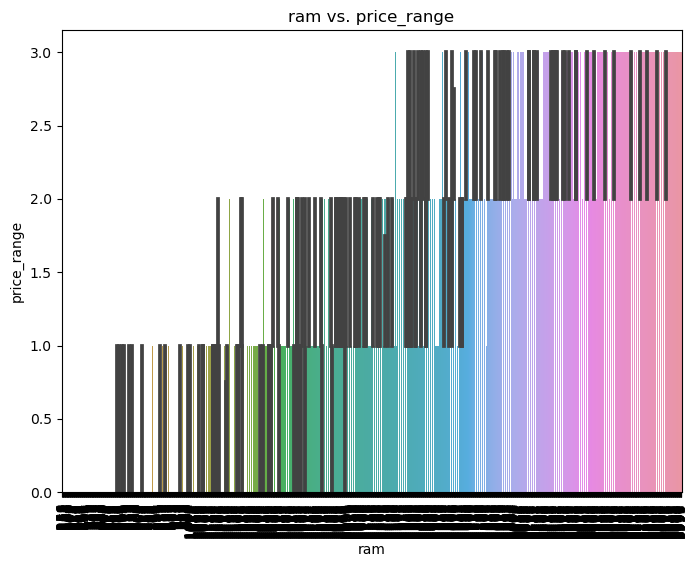

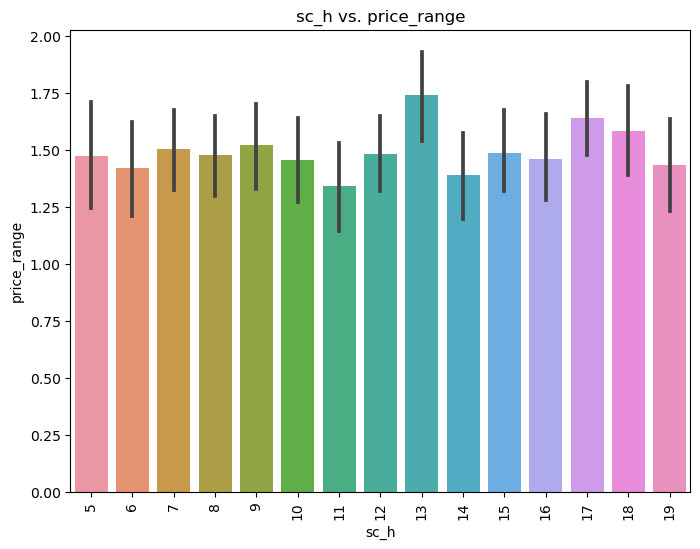

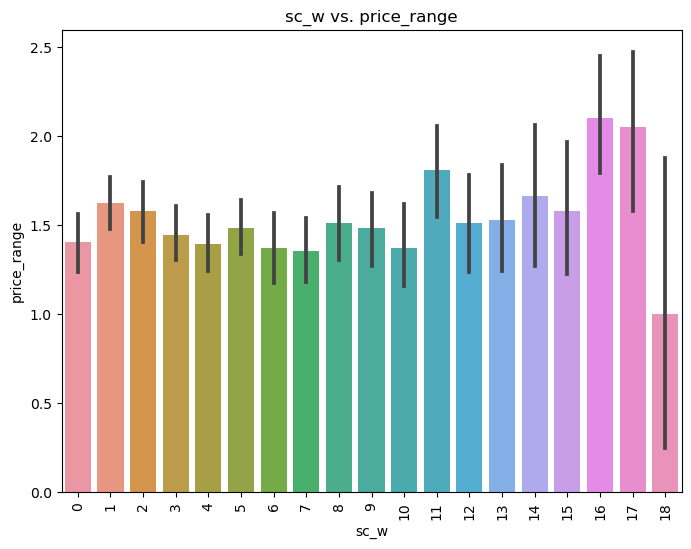

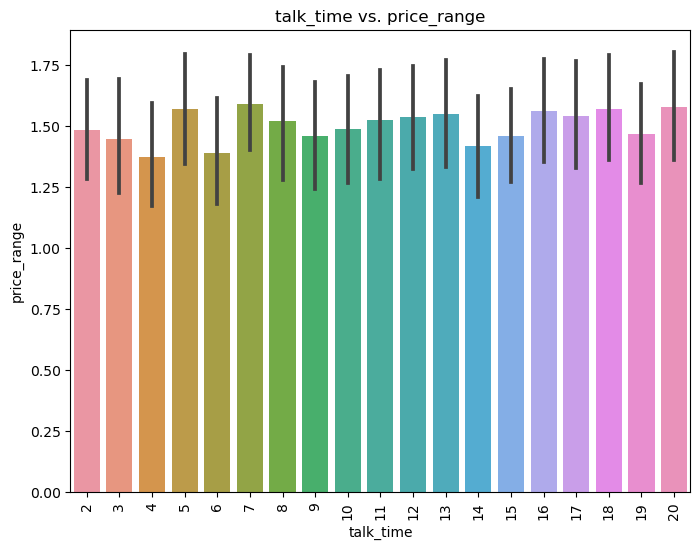

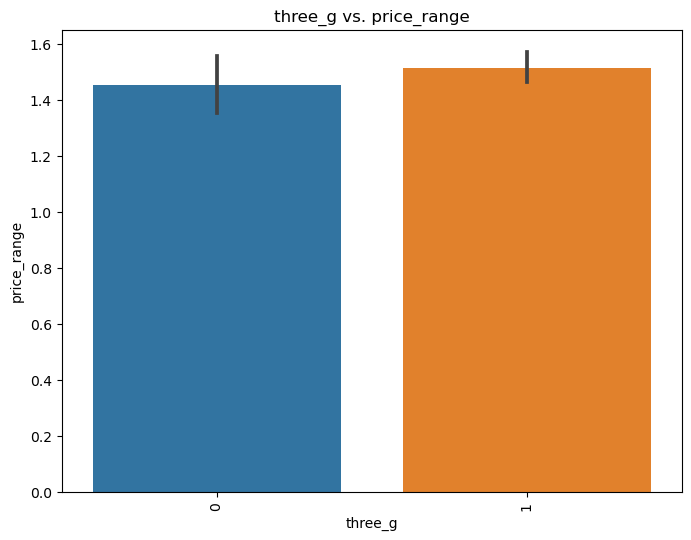

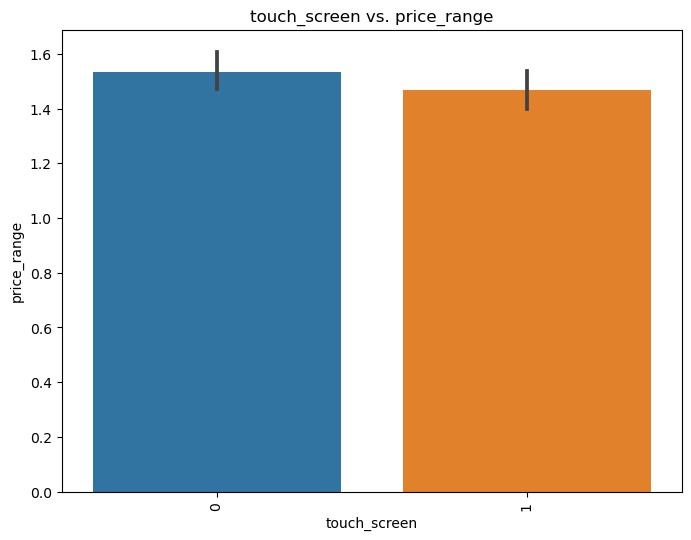

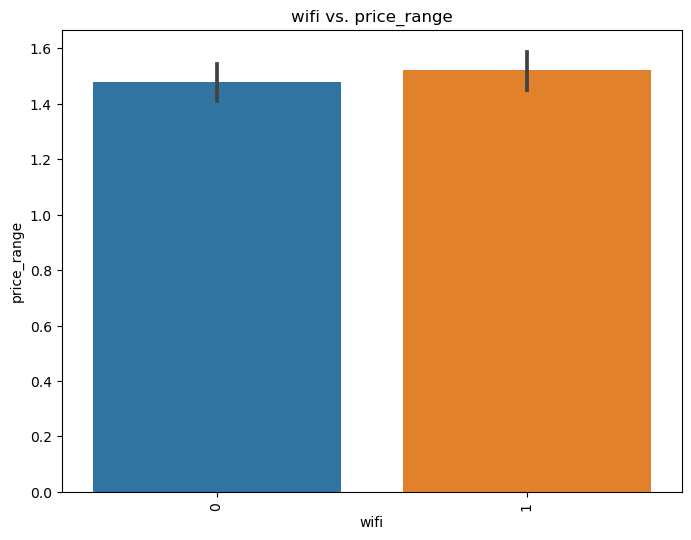

In [7]:
for feature in df.drop('price_range', axis=1).columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature, y='price_range', data=df)
    plt.xlabel(feature)
    plt.ylabel('price_range')
    plt.title(f'{feature} vs. price_range')
    plt.xticks(rotation=90) 
    plt.show()

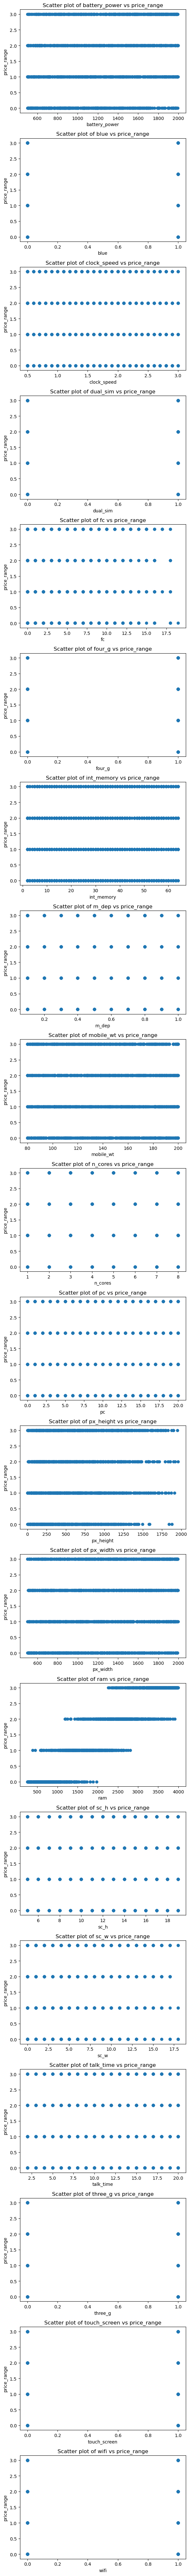

In [8]:
features = df.drop(columns='price_range')
target = df['price_range']

# Create scatter plots for each feature with the target
fig, axes = plt.subplots(nrows=len(features.columns), ncols=1, figsize=(6, 4 * len(features.columns)))

for i, col in enumerate(features.columns):
    ax = axes[i]
    ax.scatter(features[col], target)
    ax.set_xlabel(col)
    ax.set_ylabel('price_range')
    ax.set_title(f'Scatter plot of {col} vs price_range')

plt.tight_layout()
plt.show()

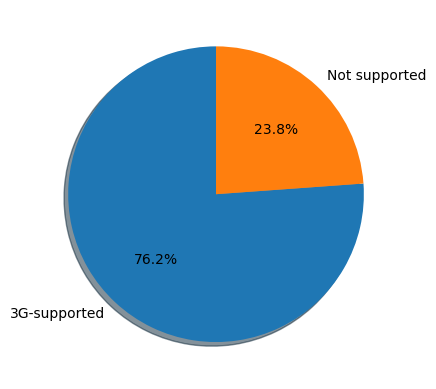

In [30]:
labels = ["3G-supported", 'Not supported']
values=df['three_g' ].value_counts().values
fig1, ax1 = plt.subplots ()
ax1.pie (values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show ()

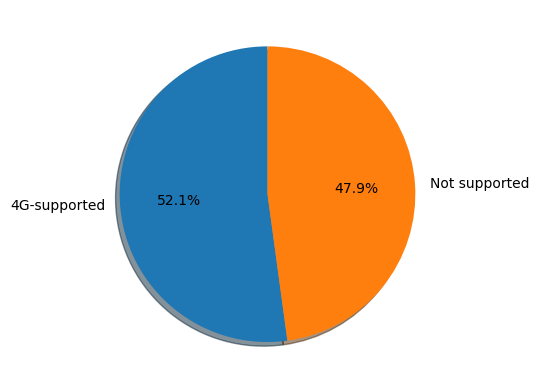

In [31]:
labels = ["4G-supported", 'Not supported']
values=df['four_g' ].value_counts().values
fig1, ax1 = plt.subplots ()
ax1.pie (values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show ()

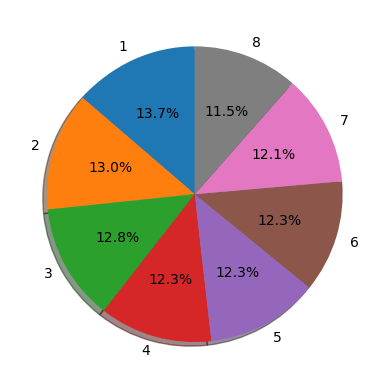

In [32]:
labelsc = ['1', '2', '3', '4', '5', '6', '7', '8']
valuesc = df['n_cores'].value_counts(). values
fig1, ax1 = plt.subplots ()
ax1.pie (valuesc, labels=labelsc, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show ()

In [ ]:
#first we define X and y then we use Kfold then delete bad folds and merged new data and redefine X and y with new data 

# Decision Tree

In [14]:


# Define the index ranges to delete
# it comes from Kfold
index_ranges_to_delete = [(1560, 1570), (750, 760), (1790, 1800)]

# Create a list to store the data after deleting the specified index ranges
new_data_list = []

# Delete the specified index ranges from the DataFrame
index_to_delete = set()
for start, end in index_ranges_to_delete:
    index_to_delete.update(range(start, end + 1))

# Filter and create the new dataset
for index, row in df.iterrows():
    if index not in index_to_delete:
        new_data_list.append(row)

# Create a new DataFrame from the filtered data
new_df = pd.DataFrame(new_data_list)

# Merge the new DataFrame with the original DataFrame and reset the index
merged_df = pd.concat([df, new_df], ignore_index=True)

print(merged_df)


      battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0             842.0   0.0          2.2       0.0   1.0     0.0         7.0   
1            1021.0   1.0          0.5       1.0   0.0     1.0        53.0   
2             563.0   1.0          0.5       1.0   2.0     1.0        41.0   
3             615.0   1.0          2.5       0.0   0.0     0.0        10.0   
4            1821.0   1.0          1.2       0.0  13.0     1.0        44.0   
...             ...   ...          ...       ...   ...     ...         ...   
3962          794.0   1.0          0.5       1.0   0.0     1.0         2.0   
3963         1965.0   1.0          2.6       1.0   0.0     0.0        39.0   
3964         1911.0   0.0          0.9       1.0   1.0     1.0        36.0   
3965         1512.0   0.0          0.9       0.0   4.0     1.0        46.0   
3966          510.0   1.0          2.0       1.0   5.0     1.0        45.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     r

In [15]:
df1= pd.DataFrame(merged_df)
df1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,794.0,1.0,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0,0.0
3963,1965.0,1.0,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,1.0,1.0,2.0
3964,1911.0,0.0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,1.0,0.0,3.0
3965,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0,0.0


In [16]:
X=df1.drop(columns='price_range')
y=df1.price_range.values.reshape(-1,1)
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,794.0,1.0,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,14.0,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0
3963,1965.0,1.0,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,3.0,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,1.0,1.0
3964,1911.0,0.0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,3.0,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,1.0,0.0
3965,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,5.0,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0


In [17]:
kf_validation=KFold(200)

result= cross_val_score(model,X,y,cv=kf_validation)
print(result)
sorted_indices = sorted(range(len(result)), key=lambda k: result[k])

# Get the indices of the top 3 lowest values
top_3_lowest_indices = sorted_indices[:3]

print("Indices of the top 3 lowest values:", top_3_lowest_indices)

[0.5        0.55       0.4        0.7        0.5        0.55
 0.5        0.5        0.4        0.5        0.45       0.65
 0.5        0.5        0.5        0.6        0.4        0.35
 0.6        0.5        0.45       0.5        0.45       0.65
 0.5        0.5        0.5        0.35       0.65       0.65
 0.4        0.3        0.45       0.6        0.45       0.65
 0.5        0.4        0.7        0.55       0.6        0.7
 0.45       0.65       0.4        0.55       0.35       0.65
 0.5        0.7        0.6        0.5        0.3        0.65
 0.35       0.6        0.4        0.3        0.4        0.5
 0.35       0.55       0.4        0.65       0.5        0.6
 0.3        0.25       0.55       0.75       0.45       0.5
 0.3        0.5        0.55       0.45       0.4        0.4
 0.4        0.5        0.45       0.5        0.45       0.3
 0.55       0.45       0.4        0.6        0.55       0.45
 0.55       0.35       0.95       0.6        0.7        0.5
 0.3        0.6        0.35    

In [18]:
max_depth_values = range(1, 21)
best_max_depth = None
best_score = 0.0

# Loop through the max_depth values and find the best one
for max_depth in max_depth_values:
    # Create a Decision Tree model with the current max_depth
    model = DecisionTreeClassifier(max_depth=max_depth,random_state=0)
    
    # Use cross-validation to evaluate the model's performance
    scores = cross_val_score(model, X, y, cv=5)  # You can adjust the number of cross-validation folds as needed
    
    # Calculate the average performance score across all folds
    avg_score = np.mean(scores)
    
    # Check if the current max_depth gives a higher score than the previous best
    if avg_score > best_score:
        best_score = avg_score
        best_max_depth = max_depth

# Print the best max_depth and its corresponding performance score
print("Best max_depth:", best_max_depth)
print("Best score:", best_score)

Best max_depth: 19
Best score: 0.9974801553898882


In [19]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.15,random_state=0)

In [20]:
clf=DecisionTreeClassifier(max_depth= 19,criterion= 'entropy',random_state=0) 
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


In [21]:
print ('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9731543624161074


# Random forest

In [22]:
x=df1.drop(columns='price_range')
Y=df1.price_range.values.reshape(-1,1)
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,794.0,1.0,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,14.0,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0
3963,1965.0,1.0,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,3.0,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,1.0,1.0
3964,1911.0,0.0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,3.0,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,1.0,0.0
3965,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,5.0,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0


In [35]:
###def DTs (Xd, yd, Testsize, mdepth) :
'''   df_evaluation=pd.DataFrame ()
    for × in Testsize:
        X_train, X_test, y_train, y_test = train_test_split (Xd, yd, test_size=x, random_state=0 )
        for maxdepth in mdepth:
            clf=DecisionTreeClassifier(max_depth=maxdepth)
            clf. fit (X_train,y_train)
            y_pred=clf.predict (X_test)
            dict = ('Test_size': x, "Max_depth": maxdepth, 'acc': metrics.accuracy_score (y_test,y_pred), "score": clf. score(X,y)}
            df_evaluation=df_evaluation.append (dict, ignore_index = True)
    return (df_evaluation)
#This function highlights Maximum values 
def highlight_max (s) :
    is_max = s == s.max ()
  return ['background-color: yellow' if v else '' for v in is_max]
{''' 


'   df_evaluation=pd.DataFrame ()\n    for × in Testsize:\n        X_train, X_test, y_train, y_test = train_test_split (Xd, yd, test_size=x, random_state=0 )\n        for maxdepth in mdepth:\n            clf=DecisionTreeClassifier(max_depth=maxdepth)\n            clf. fit (X_train,y_train)\n            y_pred=clf.predict (X_test)\n            dict = (\'Test_size\': x, "Max_depth": maxdepth, \'acc\': metrics.accuracy_score (y_test,y_pred), "score": clf. score(X,y)}\n            df_evaluation=df_evaluation.append (dict, ignore_index = True)\n    return (df_evaluation)\n#This function highlights Maximum values \ndef highlight_max (s) :\n    is_max = s == s.max ()\n  return [\'background-color: yellow\' if v else \'\' for v in is_max]\n{'

In [ ]:
##df_evaluation = DTs (Xd, yd, [.1,.15, .2, .25,.3], [1,2,3,4,5,6,7,8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,20])
##df_evaluation.style.apply (highlight _max)

In [23]:
x_train,x_test,Y_train,Y_test= train_test_split(x,Y, test_size=0.15,random_state=1)

In [24]:
clf1=RandomForestClassifier(n_estimators=100,max_depth=10, random_state= 0)
clf1=clf1.fit(x_train,Y_train)
y_pred2=clf1.predict(x_test)

In [25]:

results_df = pd.DataFrame(columns=['n_estimators', 'mean_accuracy'])

# List of n_estimators values to try
n_estimators_list = [50, 100, 200, 500]

for n_estimators in n_estimators_list:
    # Initialize the RandomForestClassifier with the current n_estimators value
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=0,max_depth= 19)

    # Perform cross-validation to evaluate the model's performance
    # Using accuracy as the scoring metric, you can use other metrics as needed
    scores = cross_val_score(model, x, Y, cv=5, scoring='accuracy')

    # Calculate the mean accuracy across all cross-validation folds
    mean_accuracy = np.mean(scores)

    # Append the results to the DataFrame
    results_df = results_df.append({'n_estimators': n_estimators, 'mean_accuracy': mean_accuracy}, ignore_index=True)

# Find the best n_estimators based on the highest mean accuracy
best_n_estimators = results_df.loc[results_df['mean_accuracy'].idxmax(), 'n_estimators']

print(results_df)
print("Best n_estimators:", best_n_estimators)


   n_estimators  mean_accuracy
0          50.0       0.997480
1         100.0       0.997984
2         200.0       0.997984
3         500.0       0.997984
Best n_estimators: 100.0


In [26]:
print ('Accuracy:',metrics.accuracy_score(Y_test,y_pred2))

Accuracy: 0.988255033557047


# SVM

In [ ]:
X1=df1.drop(columns='price_range')
y1=df1.price_range.values.reshape(-1,1)
X1

In [ ]:
X1_train,X1_test,y1_train,y1_test= train_test_split(X1,y1, test_size=0.15,random_state=0)

In [ ]:
clf2=SVC(kernel='poly', C=20.0, gamma='scale',degree=3, random_state=0)
clf2=clf2.fit(X1_train,y1_train)
y_pred3=clf2.predict(X1_test)


In [ ]:
print ('Accuracy:',metrics.accuracy_score(y1_test,y_pred3))

In [ ]:
data1=pd.read_csv("/Users/behrad/Documents/imt tmrin/test.csv")
df2= pd.DataFrame(data1)
df2

In [ ]:
X_new=df2.drop(columns='id')
predictions = clf2.predict(X_new)

# The 'predictions' variable  contains the predicted target labels for the new dataset
print(predictions)

In [ ]:
df['Price'] = predictions
df

In [ ]:
predictions1 = clf1.predict(X_new)

# The 'predictions' variable  contains the predicted target labels for the new dataset
print(predictions)